# Fraud Detection Model Overview

The dataset contains 6,362,620 rows with various columns, including features like transaction type, amount, and balances, as well as the target variable isFraud.

To address the class imbalance problem, where fraudulent transactions are rare, I opted for downsampling. This technique involves reducing the number of samples from the majority class (non-fraudulent transactions) to match the number of samples in the minority class (fraudulent transactions). This creates a balanced dataset for training the model.

I transformed and prepared the features for the model, which included normalizing or scaling the transaction amounts and balances. This ensures that all features are on a similar scale, making it easier for the model to learn from the data.

I initially experimented with various algorithms including Decision Tree, Random Forest, SVM, and XGBoost. However, these algorithms were overfitting the data, meaning they were too closely fitting the training data and not generalizing well to new data. As a result, they were not suitable for this particular problem.

Therefore, I decided to use Logistic Regression for its simplicity and interpretability in binary classification problems. Logistic Regression estimates the probability of a transaction being fraudulent by applying a logistic function to a linear combination of input features.

I trained the Logistic Regression model on the balanced dataset created by downsampling the majority class. This involved fitting the model to the data and allowing it to learn the patterns associated with fraudulent transactions.

To assess the performance of the model, I used various metrics including accuracy, classification report, and confusion matrix:

Accuracy measures the proportion of correctly classified transactions.
Classification Report provides details on precision, recall, and F1-score for both classes (fraudulent and non-fraudulent).
Confusion Matrix shows the number of true positives, true negatives, false positives, and false negatives, giving a more detailed view of the model's performance.
Based on these evaluation metrics, I may refine the model further by adjusting parameters or exploring other algorithms if necessary. The goal is to ensure the model effectively detects fraudulent transactions with a good balance between precision and recall.

In [ ]:
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Importing the Dataset

In [4]:
df = pd.read_csv('Fraud.csv')

In [5]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2819333,225,PAYMENT,8351.84,C1171122522,0.00,0.00,M647769656,0.00,0.00,0,0
1851845,164,PAYMENT,22768.80,C1345583096,139561.93,116793.13,M1581919971,0.00,0.00,0,0
2216046,186,PAYMENT,2936.90,C1150132205,0.00,0.00,M666818432,0.00,0.00,0,0
2940601,230,PAYMENT,2769.75,C58855043,95241.16,92471.40,M630629217,0.00,0.00,0,0
4423879,322,CASH_OUT,549448.31,C23796824,55754.77,0.00,C1882514356,1082295.19,1631743.51,0,0


In [6]:
# Step
# Each "step" is like an hour on a clock. For this dataset, one step equals one hour. 
# The total number of steps (hours) is 744, covering 30 days.

In [7]:
# Type
# This tells you what kind of transaction happened:
# CASH-IN: Adding money to an account.
# CASH-OUT: Taking money out of an account.
# DEBIT: Spending money from an account.
# PAYMENT: Paying for something from an account.
# TRANSFER: Moving money from one account to another.

In [8]:
# Amount
# The amount of money involved in the transaction

In [9]:
# NameOrig
# The account number of the person or entity who started the transaction.

In [10]:
# OldbalanceOrg
# The balance of the sender’s account before the transaction took place.

In [11]:
# NewbalanceOrig
# The balance of the sender’s account after the transaction.

In [12]:
# NameDest
# The account number of the person or entity receiving the money.

In [13]:
# OldbalanceDest
# The balance of the recipient’s account before the transaction. 
# For accounts starting with "M" (merchants), this information is not available.

In [14]:
# NewbalanceDest
# The balance of the recipient’s account after the transaction. 
# For accounts starting with "M" (merchants), this information is not available.

In [15]:
# IsFraud
# Indicates whether the transaction was made by someone trying to cheat the system (1 for fraud, 0 for not fraud). 
# Fraudulent behavior involves taking over accounts and transferring money out.

In [16]:
# IsFlaggedFraud
# Shows whether the transaction was flagged as suspicious because it involved transferring more than 200,000 units of money at once 
# (1 for flagged, 0 for not flagged).

## Exploratory Data Analysis

In [17]:
# checking the shape of the dataset
df.shape

(6362620, 11)

In [18]:
 # to understad the quantiles of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [19]:
# To check the data types of the columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [20]:
# to check if there are any  null values in the dataset
df.isnull().sum()  

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [21]:
# to check for duplicate values of the dataset
df.duplicated().sum() 

0

In [22]:
# dropping irrelevant 'object' columns
df.drop(columns=['nameOrig','nameDest'],inplace=True)  
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


min count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: step, dtype: float64


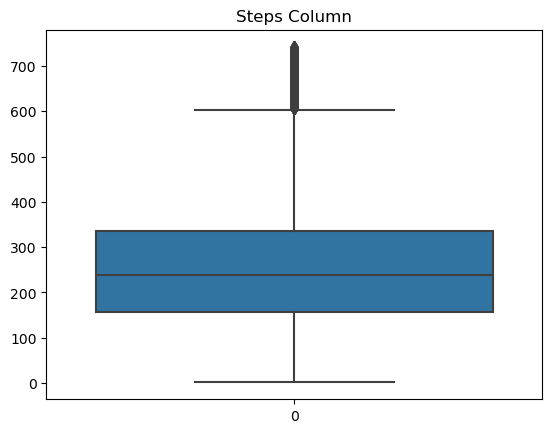

In [23]:
# creating boxplot for the steps column
print(f"min {df['step'].describe()}")
sns.boxplot(df['step'])
plt.title('Steps Column')
plt.show()

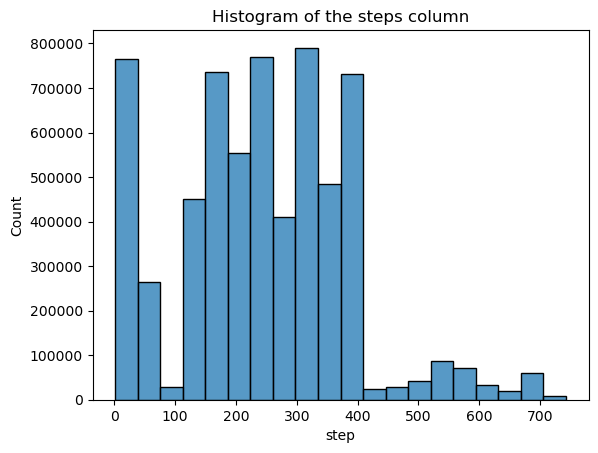

In [24]:
# creating boxplot for the steps column
sns.histplot(df['step'],bins=20)
plt.title('Histogram of the steps column')
plt.show()

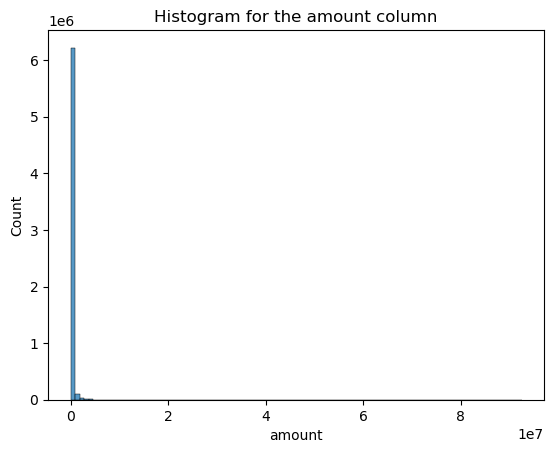

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


In [25]:
# creating histogram for the amount column
sns.histplot(df['amount'],bins=100)
plt.title('Histogram for the amount column')
plt.show()
print(df['amount'].describe())

In [26]:
# this looks like a useless column as only 16 frauds were detected which is negligible
df['isFlaggedFraud'].value_counts() 

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [27]:
# dropping the isFlaggedFraud column
df.drop(columns=['isFlaggedFraud'],inplace=True)
df.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,850002.52,0.0,6510099.11,7360101.63,1


In [28]:
df1 = df.copy()

oldbalanceOrg
count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64


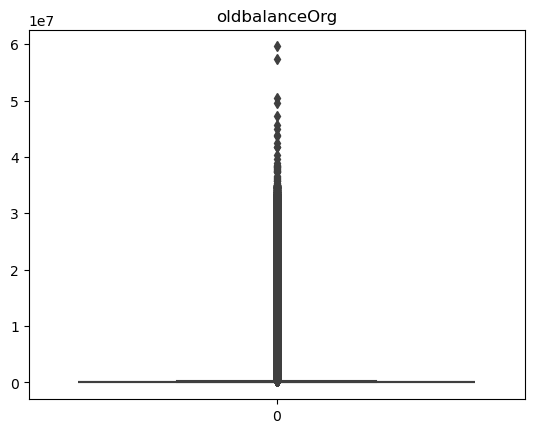

newbalanceOrig
count    6.362620e+06
mean     8.551137e+05
std      2.924049e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.442584e+05
max      4.958504e+07
Name: newbalanceOrig, dtype: float64


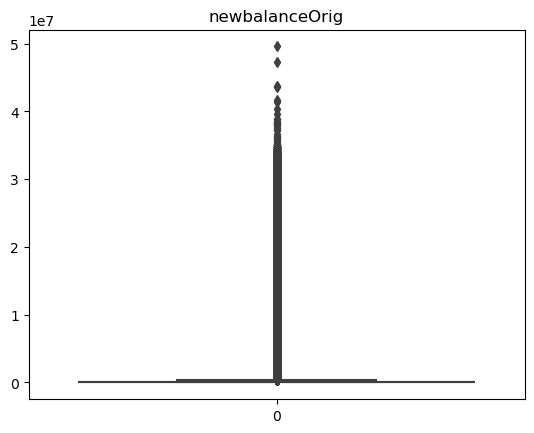

oldbalanceDest
count    6.362620e+06
mean     1.100702e+06
std      3.399180e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327057e+05
75%      9.430367e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64


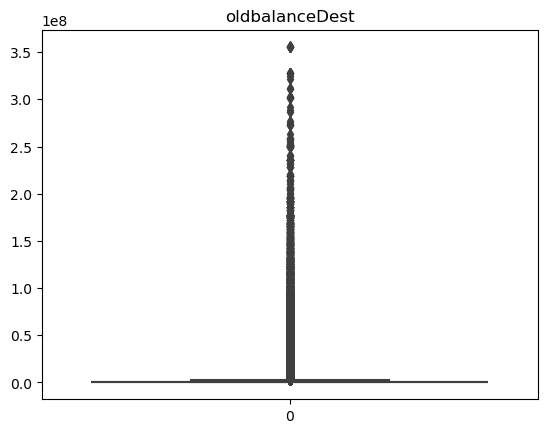

newbalanceDest
count    6.362620e+06
mean     1.224996e+06
std      3.674129e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.146614e+05
75%      1.111909e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64


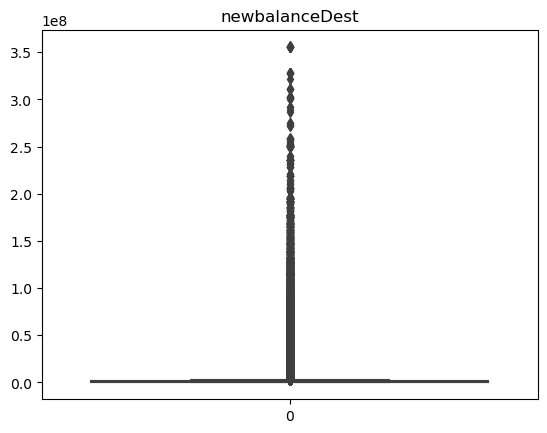

In [29]:
# creating boxplot for 4 columns related tosender and reciever's balance
for i in df.iloc[:,3:7].columns:
    print(i)
    print(df[i].describe())
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

isFraud
0    6354407
1       8213
Name: count, dtype: int64


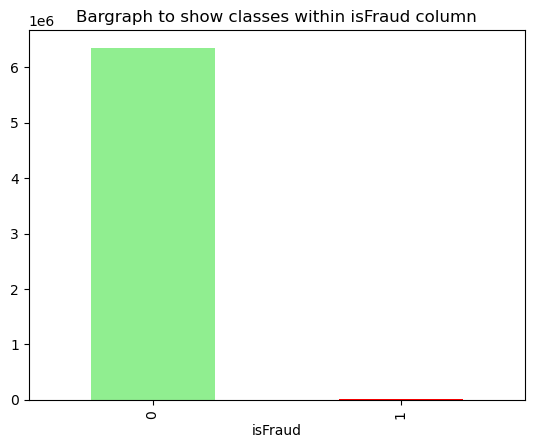

In [30]:
# understanding the target column
print(df['isFraud'].value_counts())
df['isFraud'].value_counts().plot(kind='bar',color=['lightgreen','red'])
plt.title('Bargraph to show classes within isFraud column')
plt.show()

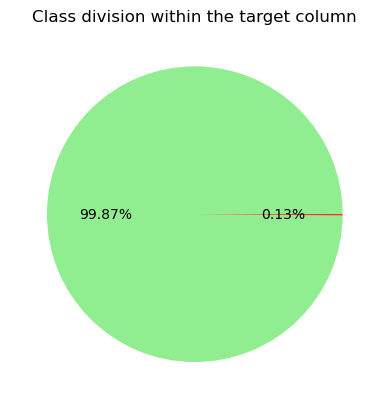

In [31]:
# understand the distribution of target column
plt.pie(df['isFraud'].value_counts(),colors=['lightgreen','red'],autopct='%0.2f%%')
plt.title('Class division within the target column')
plt.show()

In [32]:
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

# Separate majority and minority classes
df_majority = df[df.isFraud == 0]
df_minority = df[df.isFraud == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # Sample without replacement
                                   n_samples=len(df_minority)*3,  # 3 times the minority class samples
                                   random_state=42)  # For reproducibility

# Combine downsampled majority class with minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
new_df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Output the balanced dataset
print(f"Balanced dataset shape: {new_df['isFraud'].value_counts()}")

Balanced dataset shape: isFraud
0    24639
1     8213
Name: count, dtype: int64


Text(0.5, 1.0, 'Scatterplot showing steps vs amount columns')

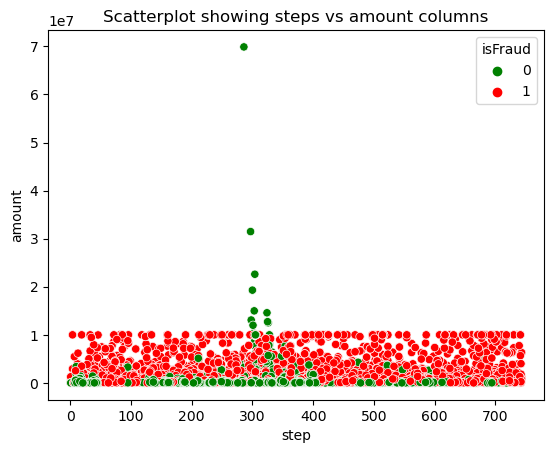

In [33]:
# creating a scatterplot for bivariate analysis
palette = {0: 'green', 1: 'red'}
sns.scatterplot(data=new_df,x='step',y='amount',hue='isFraud',palette = palette)
plt.title('Scatterplot showing steps vs amount columns')

Text(0.5, 1.0, 'Bargraph showing type vs amount columns')

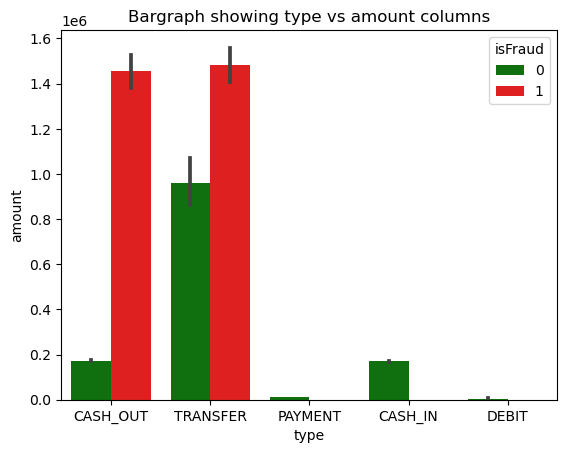

In [34]:
# creating a barchart for bivariate analysis
palette = {0: 'green', 1: 'red'}
sns.barplot(data=new_df,x='type',y='amount',hue='isFraud',palette = palette)
plt.title('Bargraph showing type vs amount columns')

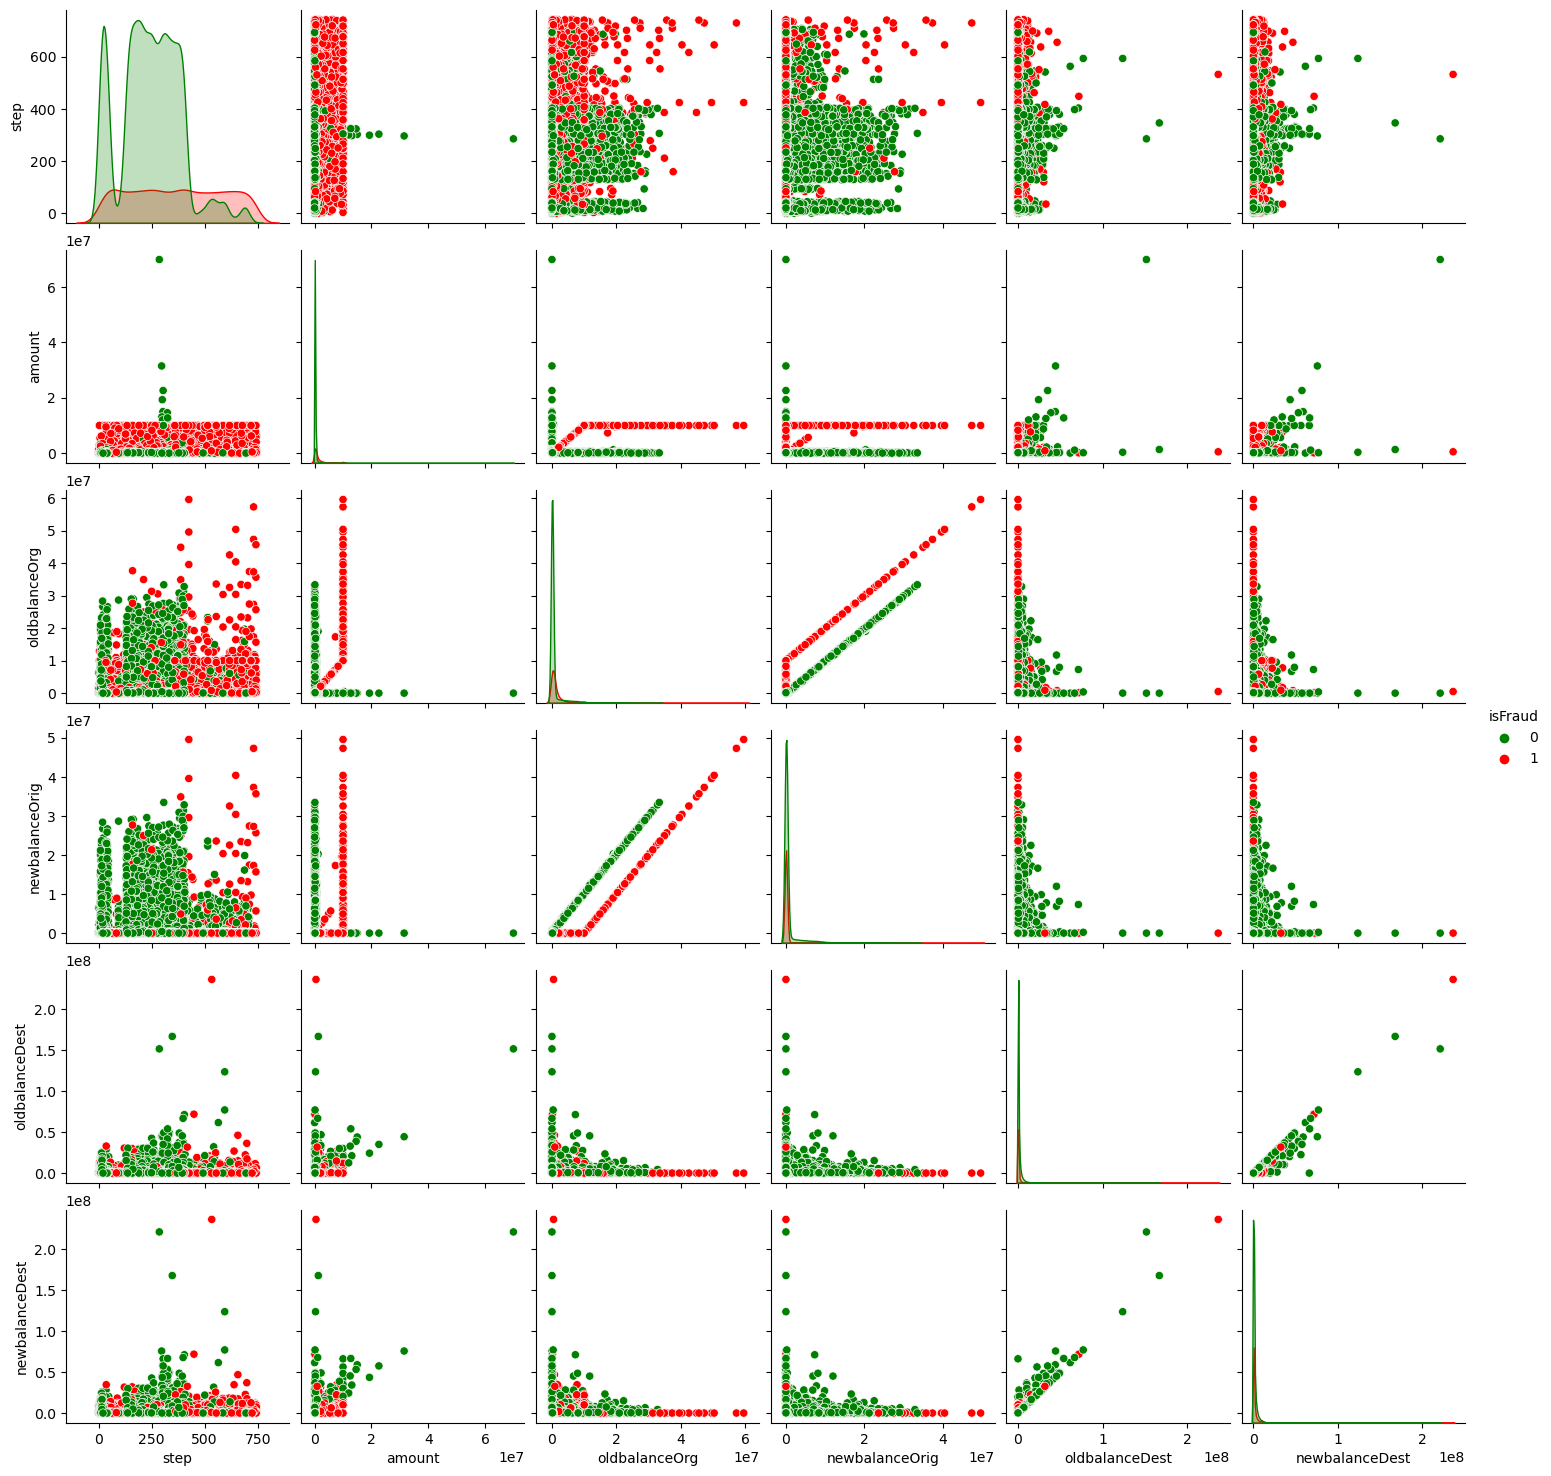

In [35]:
# creating a pairplot to understand the relationship between all columns
sns.pairplot(new_df,hue='isFraud',palette = {0: 'green', 1: 'red'})
plt.show()

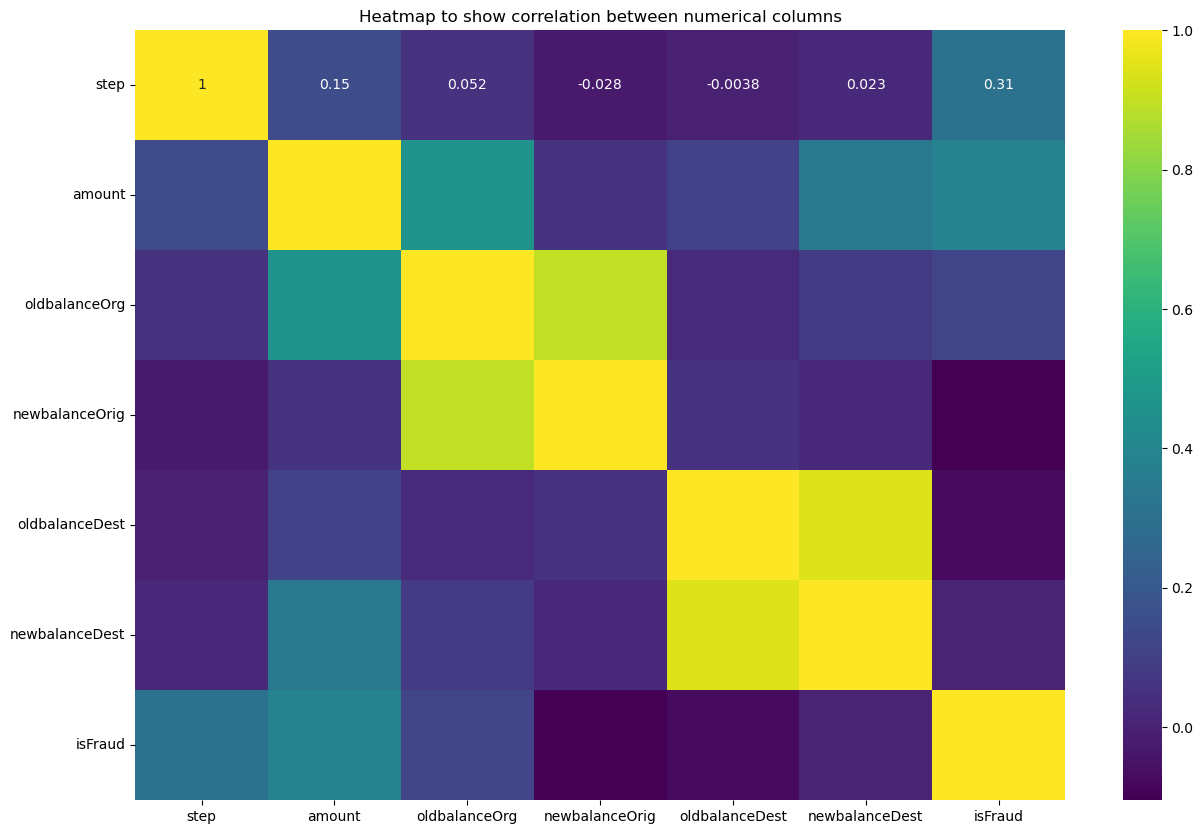

In [36]:
# creating a heatmap to understand the correlation between columns
plt.subplots(figsize=[15,10])
sns.heatmap(new_df.select_dtypes(['int64','float64']).corr(),cmap='viridis',annot=True)
plt.title('Heatmap to show correlation between numerical columns')
plt.show()

## Feature Engineering

Some algorithms work well with standardized data while some work well with normalized data

So we will make three datasets with normalized columns , standardized columns and original majority downscaled dataset

In [37]:
# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

normalized_df = new_df.copy()
c = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in c:
    normalized_df[i] = mm_scaler.fit_transform(normalized_df[[i]])

In [38]:
normalized_df.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
32308,0.242588,CASH_IN,0.001302,0.024064,0.030752,0.005573,0.005177,0
23140,0.185984,CASH_IN,0.007435,0.000517,0.011100,0.000186,0.000000,0
3909,0.469003,CASH_OUT,0.001052,0.000000,0.000000,0.001091,0.001399,0
19127,0.016173,TRANSFER,0.007980,0.000000,0.000000,0.007915,0.010283,0
6815,0.532345,CASH_IN,0.005283,0.000521,0.008072,0.000886,0.000000,0


In [39]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

standardized_df = new_df.copy()
c = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in c:
    standardized_df[i] = ss.fit_transform(standardized_df[[i]])

In [40]:
standardized_df.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
13669,-0.756584,CASH_OUT,-0.274412,-0.303611,-0.253591,-0.148143,-0.178009,1
6204,1.069095,CASH_OUT,-0.304975,-0.318271,-0.253591,-0.043295,-0.097116,1
32747,-1.201448,CASH_OUT,0.358549,0.000020,-0.253591,-0.290404,-0.057986,1
3986,2.149481,CASH_OUT,-0.302385,-0.317029,-0.253591,0.338409,0.241603,1
11154,-0.548595,CASH_IN,-0.294875,1.203602,1.521301,-0.036029,-0.125459,0


In [41]:
# Label encoding the type column so that it becomes relevant for the ML algorithms that usually work well with numerical data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(standardized_df['type'])
lb.fit(normalized_df['type'])
lb.fit(new_df['type'])

LabelEncoder()

In [42]:
standardized_df['type'] = lb.transform(standardized_df['type'])
normalized_df['type'] = lb.transform(normalized_df['type'])
new_df['type'] = lb.transform(new_df['type'])

In [43]:
standardized_df['type'].unique()

array([1, 4, 3, 0, 2])

In [44]:
normalized_df['type'].unique()

array([1, 4, 3, 0, 2])

In [45]:
new_df['type'].unique()

array([1, 4, 3, 0, 2])

## Model Selection

In [46]:
# importing train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [47]:
# dividing dataset into training and testing set
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
# # dividing dataset into training and testing set for normalized dataset
Xn = normalized_df.iloc[:,:-1]
yn = normalized_df.iloc[:,-1]

In [50]:
Xn_train,Xn_test,yn_train,yn_test = train_test_split(Xn,yn,test_size=0.2,random_state=42)

In [51]:
# # dividing dataset into training and testing set for standardized dataset
Xs = standardized_df.iloc[:,:-1]
ys = standardized_df.iloc[:,-1]

In [52]:
Xs_train,Xs_test,ys_train,ys_test = train_test_split(Xs,ys,test_size=0.2,random_state=42)

### Logistic Regression

For Logistic Regression, it is generally recommended to use standardized or normalized data. Logistic Regression is sensitive to the scale of the input features, so scaling the data can lead to better model performance and faster convergence.

In [53]:
# importing the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [54]:
# traning data on the original dataset + type label encoded
lr = LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [55]:
# traning the Logistic Regression model on the normalized dataset
lr = LogisticRegression(max_iter=500)
lr.fit(Xn_train,yn_train)
yn_pred = lr.predict(Xn_test)

In [56]:
# training the logistic Regression model on the standardized(z-score normalized) datset
lr = LogisticRegression(max_iter=500)
lr.fit(Xs_train,ys_train)
ys_pred = lr.predict(Xs_test)

In [57]:
# Calculating the accuracy score , publishing the Classification report and confusion matrix for original dataset
print(f" For original df accuracy score is {accuracy_score(y_test,y_pred)}")

print({classification_report(y_test,y_pred)})

print(f" For original df confusion_matrix is {confusion_matrix(y_test,y_pred)}")

 For original df accuracy score is 0.9417135900167403
{'              precision    recall  f1-score   support\n\n           0       0.94      0.98      0.96      4968\n           1       0.94      0.81      0.87      1603\n\n    accuracy                           0.94      6571\n   macro avg       0.94      0.90      0.92      6571\nweighted avg       0.94      0.94      0.94      6571\n'}
 For original df confusion_matrix is [[4889   79]
 [ 304 1299]]


In [58]:
# Calculating the accuracy score , publishing the Classification report and confusion matrix for normalized dataset
print(f" For normalized df accuracy score is {accuracy_score(yn_test,yn_pred)}")

print(f" For normalized df classification_report is {classification_report(yn_test,yn_pred)}")

print(f" For normalized df confusion_matrix is {confusion_matrix(yn_test,yn_pred)}")

 For normalized df accuracy score is 0.8392938669913256
 For normalized df classification_report is               precision    recall  f1-score   support

           0       0.84      0.98      0.90      4968
           1       0.87      0.40      0.55      1603

    accuracy                           0.84      6571
   macro avg       0.85      0.69      0.73      6571
weighted avg       0.84      0.84      0.82      6571

 For normalized df confusion_matrix is [[4871   97]
 [ 959  644]]


In [59]:
# Calculating the accuracy score , publishing the Classification report and confusion matrix for standardized dataset

print(f" For standardized df accuracy score is {accuracy_score(ys_test,ys_pred)}")

print(f" For standardized df classification_report is {classification_report(ys_test,ys_pred)}")

print(f" For standardized df confusion_matrix is {confusion_matrix(ys_test,ys_pred)}")

 For standardized df accuracy score is 0.9232993456094962
 For standardized df classification_report is               precision    recall  f1-score   support

           0       0.91      0.99      0.95      4968
           1       0.98      0.70      0.82      1603

    accuracy                           0.92      6571
   macro avg       0.94      0.85      0.88      6571
weighted avg       0.93      0.92      0.92      6571

 For standardized df confusion_matrix is [[4943   25]
 [ 479 1124]]


### Decision Tree

For a Decision Tree model, the data does not need to be normalized or standardized. Decision Trees work by splitting the data based on feature values, and they are not sensitive to the scale of the input features. Therefore, you can provide the data in its raw, numerical form without normalization or standardization.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {
    'max_depth': [3, 5, 7, 10],           # Testing different depths
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5, 10],    # Minimum samples at each leaf node
    'max_leaf_nodes': [10, 15, 20, 30],   # Maximum number of leaf nodes
}

tree = DecisionTreeClassifier(random_state=42)

In [62]:
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,                        # 5-fold cross-validation
    scoring='accuracy',          # Evaluation metric (can be changed based on the task)
    n_jobs=-1,                   # Use all available cores
    verbose=1                    # Print progress during the grid search
)

In [63]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [10, 15, 20, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [64]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best parameters found: {'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9869


In [65]:
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

In [66]:
# Calculating the accuracy score , publishing the Classification report and confusion matrix 

print(f" For original df accuracy score is {accuracy_score(y_test,y_pred)}")

print(f" For original df confusion_matrix is {confusion_matrix(y_test,y_pred)}")

 For original df accuracy score is 0.9849338000304367
 For original df confusion_matrix is [[4882   86]
 [  13 1590]]


### Random Forest

Random Forests are based on decision trees, which split nodes based on feature values relative to other values in the same feature. This means that the model is insensitive to the scale or distribution of the data, so there’s no need to standardize or normalize the input features.
The model will perform splits based on the order and threshold values of features, making scaling unnecessary.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {
    'n_estimators': [100, 200, 300],             # Number of trees
    'max_depth': [None, 10, 20, 30],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']     # Number of features to consider for splits
}

In [69]:
rf = RandomForestClassifier(random_state=42)

In [70]:
# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [71]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
343 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_par

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [72]:
# Get the best model and evaluate it
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [73]:
# Calculating the accuracy score , publishing the Classification report and confusion matrix for original dataset

print(f" For original df accuracy score is {accuracy_score(y_test,y_pred)}")

print(f" For original df classification_report is {classification_report(y_test,y_pred)}")

print(f" For original df confusion_matrix is {confusion_matrix(y_test,y_pred)}")

 For original df accuracy score is 0.9923908080961802
 For original df classification_report is               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4968
           1       0.98      0.99      0.98      1603

    accuracy                           0.99      6571
   macro avg       0.99      0.99      0.99      6571
weighted avg       0.99      0.99      0.99      6571

 For original df confusion_matrix is [[4929   39]
 [  11 1592]]


### Support Vector Machine

SVMs are sensitive to the scale of the features: The SVM algorithm relies on calculating distances between data points in the feature space. If the features are on different scales (e.g., one feature ranges from 1 to 1000 while another ranges from 0 to 1), the feature with the larger range will dominate the distance calculations. This can lead to suboptimal decision boundaries.

Better performance: Standardizing the data ensures that each feature contributes equally to the model, leading to better performance and more stable results.

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [75]:
svc = SVC(random_state=42)

In [76]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only relevant for the 'poly' kernel
}

In [77]:
grid_search = GridSearchCV(
    estimator=svc, 
    param_grid=param_grid, 
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # You can use other metrics like 'f1' if needed
    n_jobs=-1,           # Use all available cores
    verbose=2
)

In [ ]:
grid_search.fit(Xs_train, ys_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
print("Best parameters found: ", grid_search.best_params_)

In [ ]:
best_svc = grid_search.best_estimator_
ys_pred = best_svc.predict(Xs_test)
print("Test Accuracy: ", accuracy_score(ys_test, ys_pred))

In [ ]:
# Calculating the accuracy score , publishing the Classification report and confusion matrix for standardized dataset

print(f" For standardized df accuracy score is {accuracy_score(ys_test,ys_pred)}")

print(f" For standardized df classification_report is {classification_report(ys_test,ys_pred)}")

print(f" For standardized df confusion_matrix is {confusion_matrix(ys_test,ys_pred)}")

### XGBoost

For XGBoost, the model works well with numerical data, and it generally does not require data to be explicitly normalized or standardized. XGBoost is a tree-based model, and tree-based models are typically not sensitive to the scale of the features.

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

In [ ]:
# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [ ]:
# Perform Grid Search CV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

In [ ]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

In [ ]:
# Calculating the accuracy score , publishing the Classification report and confusion matrix for original dataset

print(f" For original df accuracy score is {accuracy_score(y_test,y_pred)}")

print(f" For original df classification_report is {classification_report(y_test,y_pred)}")

print(f" For original df confusion_matrix is {confusion_matrix(y_test,y_pred)}")